<a href="https://colab.research.google.com/github/mezenka/pandas-ds1/blob/main/pandas_ds1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Sales Analysis**

In [18]:
import pandas as pd
import os
import requests
from io import StringIO
# import matplotlib.pyplot as plt

##### **Merging multiple csv into single df**

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/mezenka/pandas-ds1/main/data/Sales_January_2019.csv')

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [29]:
# Defining the GitHub repository URL
github_url = 'https://raw.githubusercontent.com/mezenka/pandas-ds1/main/data/'

# Fetching the repository contents using GitHub API
response = requests.get(github_url)

# Checking if the request was successful and proceeding if it was
if response.status_code == 200:
    # Parsing the JSON response containing the repository contents
    data = response.json()

    # Filtering the URLs to include only the CSV files
    csv_files = [file['name'] for file in data if file['name'].endswith('.csv')]

    dfs = []  # List to store DataFrames

for file_name in csv_files:
    url = github_url + file_name
    response = requests.get(url)

    if response.status_code == 200:
        content = response.text
        df = pd.read_csv(StringIO(content))
        dfs.append(df)
    else:
        print(f"Failed to fetch {file_name} from the GitHub repository.")

all_data = pd.concat(dfs, ignore_index=True)

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [23]:
# the same with file names by hand
"""github_url = 'https://raw.githubusercontent.com/mezenka/pandas-ds1/main/data/'

csv_files = ['Sales_January_2019.csv','Sales_February_2019.csv','Sales_March_2019.csv','Sales_April_2019.csv','Sales_May_2019.csv','Sales_June_2019.csv','Sales_July_2019.csv','Sales_August_2019.csv','Sales_September_2019.csv','Sales_October_2019.csv','Sales_November_2019.csv','Sales_December_2019.csv']

dfs = []

for file_name in csv_files:
    url = github_url + file_name
    response = requests.get(url)

    if response.status_code == 200:
        content = response.text
        df = pd.read_csv(StringIO(content))
        dfs.append(df)
    else:
        print(f"Failed to fetch {file_name} from the GitHub repository.")

concatenated_df = pd.concat(dfs, ignore_index=True)

concatenated_df.head()"""

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


##### **Cleaning and adding calculated columns**

In [30]:
# finding nulls
nulls_df = all_data[all_data.isna().any(axis=1)]
nulls_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# removing rows with nulls
all_data = all_data.dropna(how='any')
nulls_df = all_data[all_data.isna().any(axis=1)]
# checking if all rows with nulls have been removed
nulls_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [32]:
# adding columns for month and year
all_data['Month'] = all_data['Order Date'].str[:2]
all_data['Month'] = all_data['Month'].astype('int64')
all_data.head()
# get error "invalid literal for int() with base 10: 'Or'"

ValueError: ignored

In [33]:
# checking for 'Or' in the 'Order Date'
all_data[all_data['Order Date'].str[:2] == 'Or']
# see the data has repeating header row

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [34]:
# removing the repeating header row
all_data = all_data[all_data['Order Date'].str[:2] != 'Or']
# checking again
all_data[all_data['Order Date'].str[:2] == 'Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


In [35]:
# trying to add columns for month and year once again
all_data['Month'] = all_data['Order Date'].str[:2]
all_data['Month'] = all_data['Month'].astype('int64')
all_data['Year'] = '20' + all_data['Order Date'].str[6:8]
all_data['Year'] = all_data['Year'].astype('int64')
all_data.head()
# bingo!

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2019
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,2019
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,2019


In [36]:
# bringing calculable columns to proper data type
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2019
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,2019
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,2019
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,2019
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,2019
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,2019
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,2019


In [37]:
# calculating sales amount per each Order ID
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2019,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,2019,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,2019,11.99
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,2019,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,2019,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,2019,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,2019,379.99


In [38]:
# calculating sales per year/month
all_data.groupby(['Year','Month']).sum()

<ipython-input-38-05e7e369c2ea>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby(['Year','Month']).sum()


Quantity Ordered  Price Each       Sales
Year Month                                          
2019 1                 10862  1803264.98  1813586.44
     2                 13449  2188884.72  2202022.42
     3                 17005  2791207.83  2807100.38
     4                 20558  3367671.02  3390670.24
     5                 18667  3135125.13  3152606.75
     6                 15253  2562025.61  2577802.26
     7                 16072  2632539.56  2647775.76
     8                 13448  2230345.42  2244467.88
     9                 13109  2084992.09  2097560.13
     10                22703  3715554.83  3736726.88
     11                19798  3180600.68  3199603.20
     12                28114  4588415.41  4613443.34
2020 1                    41     8503.40     8670.29

In [41]:
import matplotlib.pyplot as plt

In [42]:
results = all_data.groupby('Month').sum()


<ipython-input-42-d9e765394c87>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('Month').sum()


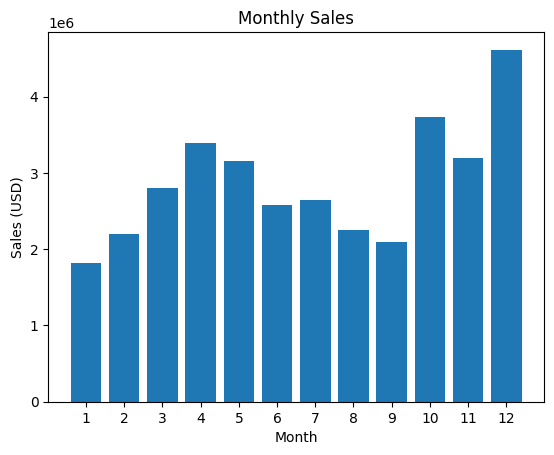

In [45]:
months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales (USD)')
plt.xlabel('Month')
plt.title('Monthly Sales')
plt.show()